<h1>REGIONE LAZIO</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE ABRUZZO ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Lazio</b> dal <b>2015</b> al <b>30 gigno 2020</b>.

In [66]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/lazio.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,5844
1,2015-02-28,5079
2,2015-03-31,5081
3,2015-04-30,4535
4,2015-05-31,4212


In [67]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [68]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,5015
63,2020-04-30,4311
64,2020-05-31,3932
65,2020-06-30,3538


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [69]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    5015
2020-04-30    4311
2020-05-31    3932
2020-06-30    3538
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE LAZIO CAUSATI DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Lazio</b> da <b> marzo 2020</b> al <b>30 giugno 2020</b>.

In [70]:
covid = pd.read_csv('../../csv/regioni_pesate/lazio.csv')
covid.head()

,data,deceduti
0,2020-03-31,141.426
1,2020-04-30,243.567
2,2020-05-31,256.662
3,2020-06-30,89.046


In [71]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [72]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,141.426
2020-04-30,243.567
2020-05-31,256.662
2020-06-30,89.046


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [73]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Lazio</b> secondo la predizione del modello SARIMA applicato. 

In [74]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_lazio.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2017-02-28,4614.000000
1,2017-03-31,4614.000000
2,2017-04-30,4590.557492
3,2017-05-31,4526.330314
4,2017-06-30,4432.582409


In [75]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2017-02-28,4614.000000
1,2017-03-31,4614.000000
2,2017-04-30,4590.557492
3,2017-05-31,4526.330314
4,2017-06-30,4432.582409


In [76]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [77]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
37,2020-03-31,4344.383349
38,2020-04-30,4048.629881
39,2020-05-31,4094.516943
40,2020-06-30,4154.916229


In [78]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,4344.383349
2020-04-30,4048.629881
2020-05-31,4094.516943
2020-06-30,4154.916229


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [79]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA

<h3>Limite massimo

In [80]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_lazio_upper.csv')
upper.head()

,Unnamed: 0,upper TOTALE
0,2017-02-28,2903.512186
1,2017-03-31,1856.180585
2,2017-04-30,1507.446299
3,2017-05-31,1390.785073
4,2017-06-30,1323.516597


In [81]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper TOTALE':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2017-02-28,2903.512186
1,2017-03-31,1856.180585
2,2017-04-30,1507.446299
3,2017-05-31,1390.785073
4,2017-06-30,1323.516597


In [82]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,1088.118513
2020-04-30,972.822956
2020-05-31,1317.594228
2020-06-30,1341.192536


In [83]:
upper = upper.Totale

<h3>Limite minimo

In [84]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_lazio_lower.csv')
lower.head()

,Unnamed: 0,lower TOTALE
0,2017-02-28,-2903.512186
1,2017-03-31,-1856.180585
2,2017-04-30,-1554.331316
3,2017-05-31,-1519.239429
4,2017-06-30,-1511.012405


In [85]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower TOTALE':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2017-02-28,-2903.512186
1,2017-03-31,-1856.180585
2,2017-04-30,-1554.331316
3,2017-05-31,-1519.239429
4,2017-06-30,-1511.012405


In [86]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,-1352.045305
2020-04-30,-1564.329892
2020-05-31,-1225.820104
2020-06-30,-1220.393964


In [87]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Lazio</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b> e <b>giugno</b>.

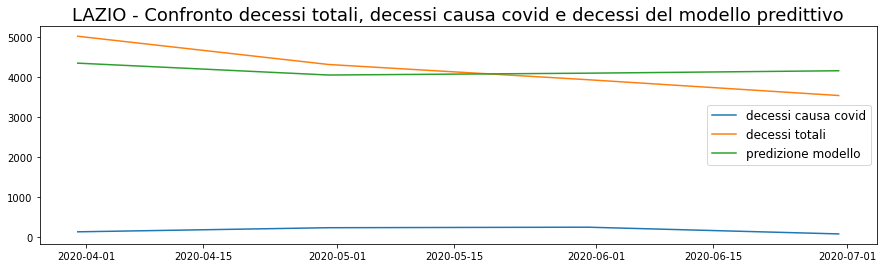

In [88]:
plt.figure(figsize=(15,4))
plt.title('LAZIO - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

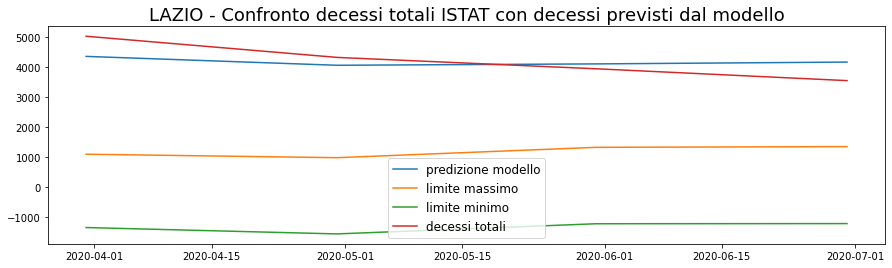

In [89]:
plt.figure(figsize=(15,4))
plt.title("LAZIO - Confronto decessi totali ISTAT con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

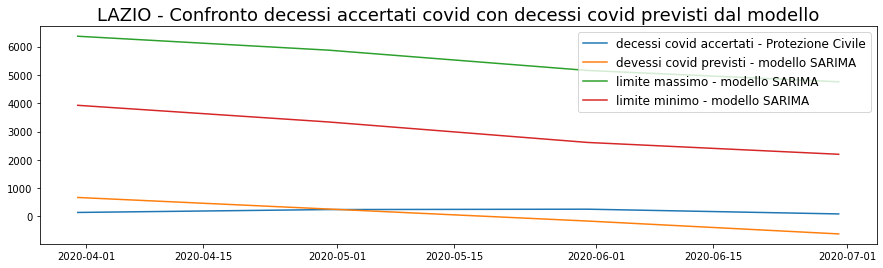

In [90]:
n = decessi_istat - predictions
n_upper = decessi_istat - lower
n_lower = decessi_istat - upper

plt.figure(figsize=(15,4))
plt.title("LAZIO - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati - Protezione Civile')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali forniti dall'ISTAT per i mesi di marzo, aprile, maggio e giugno 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 per la regione Lazio</h3>

In [91]:
m = covid.sum()
print(int(m))

730


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Lazio </h3>

<h4>Valore medio

In [92]:
total = n.sum()
print(int(total))

153


<h4>Valore massimo

In [93]:
total_upper = n_upper.sum()
print(int(total_upper))

22158


<h4>Valore minimo

In [94]:
total_lower = n_lower.sum()
print(int(total_lower))

12076


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Lazio</h3>

<h4>Valore medio

In [95]:
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

-577


<h4>Valore massimo 

In [96]:
x_upper = decessi_istat - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

21427


<h4>Valore minimo 

In [97]:
x_lower = decessi_istat - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

11345
